In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import chart_studio.plotly as py
#import plotly.express as px
#from plotly.subplots import make_subplots
from datetime import datetime

In [4]:
pip install plotly

In [5]:
import plotly.express as px

In [6]:
from plotly.subplots import make_subplots

# IMPORTING THE COVID I9 CASES AND VACCINATION DATA SETS

In [7]:
import pandas as pd
covid_file=pd.read_csv('covid.csv')

In [8]:
covid_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   STATE           37 non-null     object
 1   CONFIRMED       37 non-null     int64 
 2   RECOVERIES      37 non-null     int64 
 3   DEATHS          37 non-null     int64 
 4   ACTIVE  
CASES  37 non-null     int64 
 5   TESTING         37 non-null     int64 
 6   DATE            37 non-null     object
dtypes: int64(5), object(2)
memory usage: 2.1+ KB


In [9]:
covid_file.sum()

STATE              AbiaAdamawaAkwa IbomAnambraBauchiBayelsaBenueB...
CONFIRMED                                                     255699
RECOVERIES                                                    249813
DEATHS                                                          3143
ACTIVE  \nCASES                                                 2743
TESTING                                                      5099048
DATE               24/04/202224/04/202224/04/202224/04/202224/04/...
dtype: object

In [10]:
covid_file.head()

,STATE,CONFIRMED,RECOVERIES,DEATHS,ACTIVE \nCASES,TESTING,DATE
0,Abia,2177,2143,34,0,119436,24/04/2022
1,Adamawa,1203,1103,32,68,33806,24/04/2022
2,Akwa Ibom,4657,4586,44,27,117997,24/04/2022
3,Anambra,2825,2760,19,46,61754,24/04/2022
4,Bauchi,1958,1915,24,19,41153,24/04/2022


In [11]:
covid_file.describe()

,CONFIRMED,RECOVERIES,DEATHS,ACTIVE \nCASES,TESTING
count,37.000000,37.000000,37.000000,37.000000,3.700000e+01
mean,6910.783784,6751.702703,84.945946,74.135135,1.378121e+05
std,16536.709637,16341.246644,134.566783,129.042448,2.319949e+05
min,5.000000,3.000000,2.000000,0.000000,1.655800e+04
25%,1315.000000,1282.000000,25.000000,2.000000,4.048300e+04
50%,2560.000000,2381.000000,37.000000,19.000000,8.137200e+04
75%,5173.000000,4853.000000,90.000000,68.000000,1.179970e+05
max,99340.000000,98062.000000,769.000000,509.000000,1.292712e+06


In [12]:
covid_file['ACTIVE']=covid_file['CONFIRMED']-(covid_file['RECOVERIES']+covid_file['DEATHS'])

In [13]:
covid_file.head(3)

,STATE,CONFIRMED,RECOVERIES,DEATHS,ACTIVE \nCASES,TESTING,DATE,ACTIVE
0,Abia,2177,2143,34,0,119436,24/04/2022,0
1,Adamawa,1203,1103,32,68,33806,24/04/2022,68
2,Akwa Ibom,4657,4586,44,27,117997,24/04/2022,27


In [14]:
import pandas as pd
vaccine_file=pd.read_csv('vaccine.csv')

In [15]:
vaccine_file.head()

,State,Population,Total Vaccinated Population,First Dose (Partially Vaccinated),Second Dose (Fully Vaccinated)
0,Abia,3727347,56852,34029,22823
1,Adamawa,4248436,68510,39852,28658
2,Akwa Ibom,5482177,66166,41134,25032
3,Anambra,5527809,60382,41334,19048
4,Bauchi,6537314,97045,65625,31420


In [16]:
vaccine_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   State                              37 non-null     object
 1   Population                         37 non-null     int64 
 2   Total Vaccinated Population        37 non-null     int64 
 3   First Dose (Partially Vaccinated)  37 non-null     int64 
 4   Second Dose (Fully Vaccinated)     37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [17]:
vaccine_file.describe()

,Population,Total Vaccinated Population,First Dose (Partially Vaccinated),Second Dose (Fully Vaccinated)
count,3.700000e+01,37.000000,37.000000,37.000000
mean,5.268934e+06,106457.972973,68492.027027,37965.945946
std,2.515299e+06,102382.495659,63751.400520,38972.789924
min,2.277961e+06,30774.000000,22693.000000,8081.000000
25%,3.727347e+06,60382.000000,39852.000000,22162.000000
50%,4.671695e+06,83952.000000,54972.000000,28980.000000
75%,5.741815e+06,102626.000000,70049.000000,34718.000000
max,1.507689e+07,647788.000000,404414.000000,243374.000000


# ANALYSIS OF THE COVID 19 CASES DATA SET

In [18]:
#to create a pivot table, create another variable to save the features,then we create additional colomns we would like on the pivotable
states=pd.pivot_table(covid_file, values=['CONFIRMED','RECOVERIES','DEATHS','ACTIVE','TESTING'], index='STATE',aggfunc=max)

In [19]:
states['RECOVERY_RATE']= states['RECOVERIES']*100/states['CONFIRMED']

In [20]:
states['MORTALITY_RATE']= states['DEATHS']*100/states['CONFIRMED']

In [21]:
states['CONFIRMED/TESTING']= states['CONFIRMED']*100/states['TESTING']

In [22]:
states['ACTIVE_RATE']= states['ACTIVE']*100/states['CONFIRMED']

In [23]:
states=states.sort_values(by='CONFIRMED',ascending=False)

In [24]:
states.style.background_gradient(cmap="summer")

,ACTIVE,CONFIRMED,DEATHS,RECOVERIES,TESTING,RECOVERY_RATE,MORTALITY_RATE,CONFIRMED/TESTING,ACTIVE_RATE
STATE,,,,,,,,,
Lagos,509,99340,769,98062,1292712,98.713509,0.774109,7.684620,0.512382
FCT,85,28652,248,28319,682611,98.837777,0.865559,4.197413,0.296663
Rivers,30,16667,154,16483,467705,98.896022,0.923982,3.563571,0.179996
Kaduna,1,11258,90,11167,203148,99.191686,0.799432,5.541773,0.008883
Plateau,0,10252,75,10177,97178,99.268435,0.731565,10.549713,0.000000
Oyo,2,10221,202,10017,126650,98.004109,1.976323,8.070272,0.019568
Edo,0,7694,321,7373,174636,95.827918,4.172082,4.405735,0.000000
Ogun,11,5810,82,5717,130160,98.399312,1.411360,4.463737,0.189329
Delta,94,5375,111,5170,116701,96.186047,2.065116,4.605787,1.748837


In [25]:
#top 10 states with active case
top_10=covid_file.groupby(by='STATE').max()[['ACTIVE','DATE']].sort_values(by=(['ACTIVE']),ascending=False).reset_index()



In [26]:
#grt the figure size
fig=plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

Text(0.5, 1.0, 'Top 10 States with Active Cases')

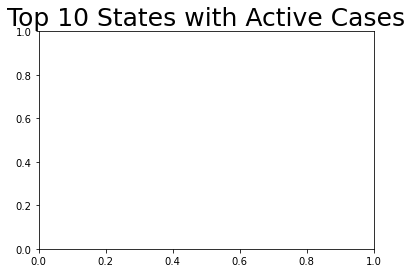

In [27]:
#plot title
plt.title("Top 10 States with Active Cases", size=25)

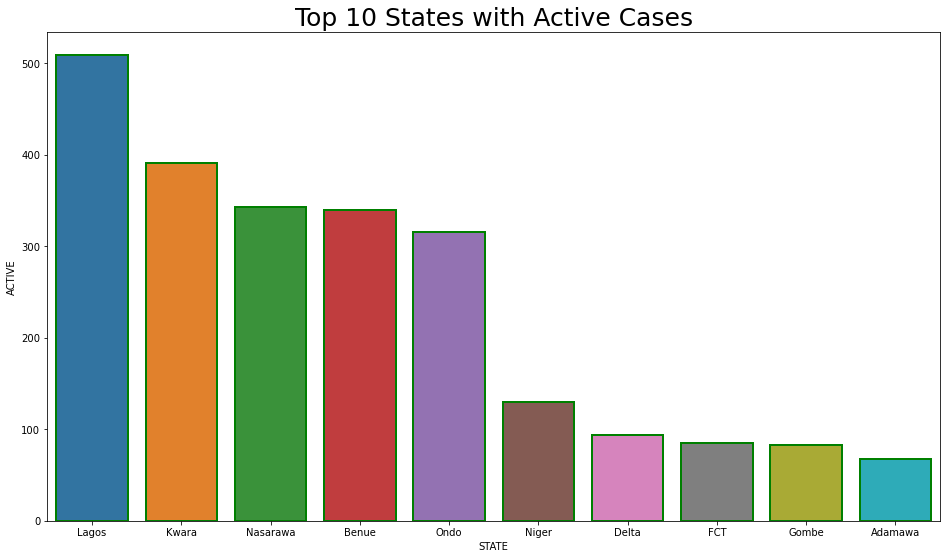

In [28]:
#top 10 states with active case
top_10=covid_file.groupby(by='STATE').max()[['ACTIVE','DATE']].sort_values(by=(['ACTIVE']),ascending=False).reset_index()
#grt the figure size
fig=plt.figure(figsize=(16,9))
#plot title
plt.title("Top 10 States with Active Cases", size=25)
#pass in the axis
ax=sns.barplot(data=top_10.iloc[:10], y='ACTIVE',x='STATE',linewidth=2,edgecolor='green')
plt.xlabel='STATE'
plt.ylabel='ACTIVE'
plt.show()

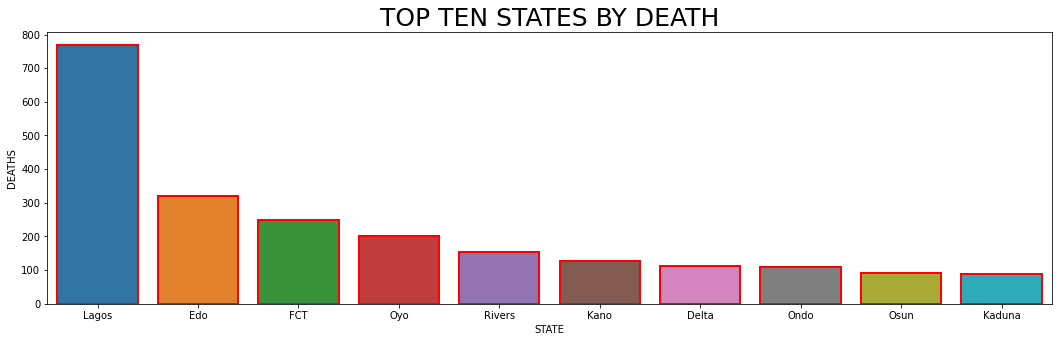

In [29]:
#top ten states with highest death
top_10_deaths=covid_file.groupby(by='STATE',).max()[['DEATHS','DATE']].sort_values(by=['DEATHS'],ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title("TOP TEN STATES BY DEATH", size=25)
ax=sns.barplot(data=top_10_deaths.iloc[:10],y='DEATHS',x='STATE',linewidth=2,edgecolor='red')

plt.xlabel='STATE'
plt.yalbel='DEATHS'
plt.show()


# VACCINE ANALYSIS FOR ALL STATES IN NIGERIA

In [30]:
vaccine_file.head()

,State,Population,Total Vaccinated Population,First Dose (Partially Vaccinated),Second Dose (Fully Vaccinated)
0,Abia,3727347,56852,34029,22823
1,Adamawa,4248436,68510,39852,28658
2,Akwa Ibom,5482177,66166,41134,25032
3,Anambra,5527809,60382,41334,19048
4,Bauchi,6537314,97045,65625,31420


In [31]:
vaccine_file.sum()

State                                AbiaAdamawaAkwa IbomAnambraBauchiBayelsaBenueB...
Population                                                                   194950543
Total Vaccinated Population                                                    3938945
First Dose (Partially Vaccinated)                                              2534205
Second Dose (Fully Vaccinated)                                                 1404740
dtype: object

In [32]:
vaccine_file['% Vaccinated']=vaccine_file['Total Vaccinated Population']*100/vaccine_file['Population']
vaccine_file.head()

,State,Population,Total Vaccinated Population,First Dose (Partially Vaccinated),Second Dose (Fully Vaccinated),% Vaccinated
0,Abia,3727347,56852,34029,22823,1.525267
1,Adamawa,4248436,68510,39852,28658,1.612593
2,Akwa Ibom,5482177,66166,41134,25032,1.206929
3,Anambra,5527809,60382,41334,19048,1.092332
4,Bauchi,6537314,97045,65625,31420,1.484478


In [33]:
vaccine_file.rename(columns={'% Vaccinated': 'Perc Vaccinated'}, inplace=True)

In [34]:
vaccine_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   State                              37 non-null     object 
 1   Population                         37 non-null     int64  
 2   Total Vaccinated Population        37 non-null     int64  
 3   First Dose (Partially Vaccinated)  37 non-null     int64  
 4   Second Dose (Fully Vaccinated)     37 non-null     int64  
 5   Perc Vaccinated                    37 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.9+ KB


In [35]:
vaccine_file.head()

,State,Population,Total Vaccinated Population,First Dose (Partially Vaccinated),Second Dose (Fully Vaccinated),Perc Vaccinated
0,Abia,3727347,56852,34029,22823,1.525267
1,Adamawa,4248436,68510,39852,28658,1.612593
2,Akwa Ibom,5482177,66166,41134,25032,1.206929
3,Anambra,5527809,60382,41334,19048,1.092332
4,Bauchi,6537314,97045,65625,31420,1.484478


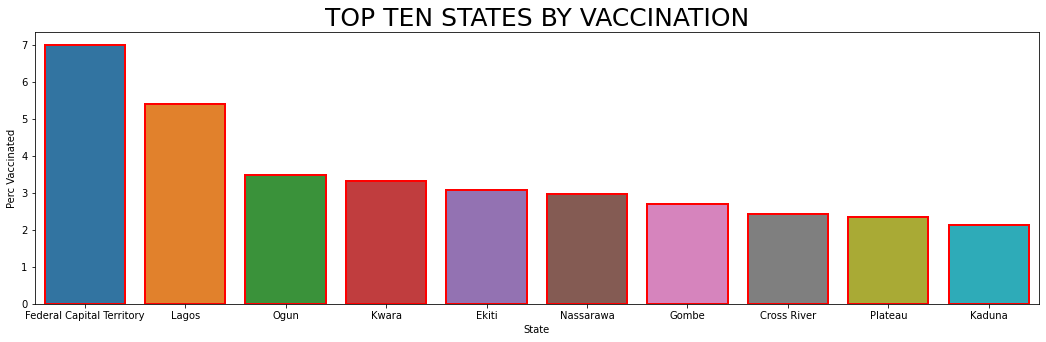

In [36]:
#top ten states by vaccination
top_10_states=vaccine_file.groupby(by='State',).max()[['Perc Vaccinated','Population']].sort_values(by=['Perc Vaccinated'],ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title("TOP TEN STATES BY VACCINATION", size=25)
ax=sns.barplot(data=top_10_states.iloc[:10],y='Perc Vaccinated',x='State',linewidth=2,edgecolor='red')

plt.xlabel='State'
plt.ylabel='Perc Vaccinated'
plt.show()

In [37]:
#to check null values
vaccine_file.isnull()

,State,Population,Total Vaccinated Population,First Dose (Partially Vaccinated),Second Dose (Fully Vaccinated),Perc Vaccinated
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [48]:
#first dose vs second dose vaccination
firstdose=vaccine_file['First Dose (Partially Vaccinated)'].sum()
second_dose=vaccine_file['Second Dose (Fully Vaccinated)'].sum()
px.pie(names=['firstdose','second_dose'], values=[firstdose,second_dose], title='First and Second dose Vaccination')


In [39]:
vaccine_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   State                              37 non-null     object 
 1   Population                         37 non-null     int64  
 2   Total Vaccinated Population        37 non-null     int64  
 3   First Dose (Partially Vaccinated)  37 non-null     int64  
 4   Second Dose (Fully Vaccinated)     37 non-null     int64  
 5   Perc Vaccinated                    37 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.9+ KB


# COVID CASES TO VACCINATION ANALYSIS

In [225]:
covid_vaccine=pd.concat([covid_file,vaccine_file],axis=1)

In [226]:
covid_vaccine.head()

,STATE,CONFIRMED,RECOVERIES,DEATHS,ACTIVE \nCASES,TESTING,DATE,ACTIVE,State,Population,Total Vaccinated Population,First Dose (Partially Vaccinated),Second Dose (Fully Vaccinated),Perc Vaccinated
0,Abia,2177,2143,34,0,119436,24/04/2022,0,Abia,3727347,56852,34029,22823,1.525267
1,Adamawa,1203,1103,32,68,33806,24/04/2022,68,Adamawa,4248436,68510,39852,28658,1.612593
2,Akwa Ibom,4657,4586,44,27,117997,24/04/2022,27,Akwa Ibom,5482177,66166,41134,25032,1.206929
3,Anambra,2825,2760,19,46,61754,24/04/2022,46,Anambra,5527809,60382,41334,19048,1.092332
4,Bauchi,1958,1915,24,19,41153,24/04/2022,19,Bauchi,6537314,97045,65625,31420,1.484478


In [227]:
#to create a pivot table, create another variable to save the features
covid_vaccine_pivot=pd.pivot_table(covid_vaccine, values=['CONFIRMED','Population','DEATHS','RECOVERIES','Total Vaccinated Population','Perc Vaccinated'], index='STATE',aggfunc=max)

In [228]:
covid_vaccine_pivot=covid_vaccine_pivot.sort_values(by='CONFIRMED',ascending=False)
covid_vaccine_pivot.style.background_gradient(cmap="Wistia")

,CONFIRMED,DEATHS,Perc Vaccinated,Population,RECOVERIES,Total Vaccinated Population
STATE,,,,,,
Lagos,99340,769,5.397964,12000598,98062,647788
FCT,28652,248,6.994253,3564126,28319,249284
Rivers,16667,154,1.601454,7303924,16483,116969
Kaduna,11258,90,2.134939,8252366,11167,176183
Plateau,10252,75,2.353848,4200442,10177,98872
Oyo,10221,202,2.086964,7840864,10017,163636
Edo,7694,321,1.666826,4235595,7373,70600
Ogun,5810,82,3.481638,5217716,5717,181662
Delta,5375,111,1.482370,5663362,5170,83952


In [229]:
covid_vaccine.columns


Index(['STATE', 'CONFIRMED', 'RECOVERIES', 'DEATHS', 'ACTIVE  \nCASES',
       'TESTING', 'DATE', 'ACTIVE', 'State', 'Population',
       'Total Vaccinated Population', 'First Dose (Partially Vaccinated)',
       'Second Dose (Fully Vaccinated)', 'Perc Vaccinated'],
      dtype='object')

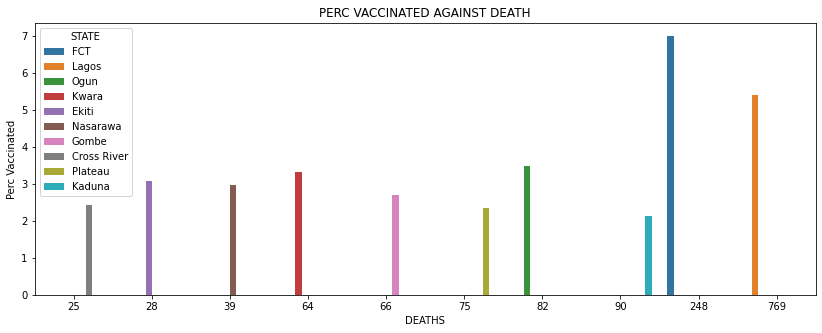

In [230]:

plt.figure(figsize=(14, 5))
vaccinevsdeaths=covid_vaccine.groupby(by='STATE',).max()[['Perc Vaccinated','DEATHS']].sort_values(by=['Perc Vaccinated'],ascending=False).reset_index()
sns.barplot(data=vaccinevsdeaths.iloc[:10],x='DEATHS',y='Perc Vaccinated', hue='STATE')
plt.title('PERC VACCINATED AGAINST DEATH')
plt.show()